<a href="https://colab.research.google.com/github/Solrac84/constructora/blob/main/Tarea_1_SerieTaylor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A -  HALLAR LA SERIE DE MCLAURIN SENO(X) X = 2*PI()

--- Configuración del Análisis de Series de Maclaurin para sen(x) ---
➤ Introduce el valor de x a evaluar (puedes usar 'pi', ej: 2*pi): 2*pi
➤ Introduce el número de términos (n) a utilizar (ej: 20): 20

--- Resultados del Cálculo ---
     n  Valor del Término  Suma Acumulada (Aprox.)   Error Real  Cota de Error
0    0       6.283185e+00             6.283185e+00 6.283185e+00   4.134170e+01
1    1      -4.134170e+01            -3.505852e+01 3.505852e+01   8.160525e+01
2    2       8.160525e+01             4.654673e+01 4.654673e+01   7.670586e+01
3    3      -7.670586e+01            -3.015913e+01 3.015913e+01   4.205869e+01
4    4       4.205869e+01             1.189957e+01 1.189957e+01   1.509464e+01
5    5      -1.509464e+01            -3.195076e+00 3.195076e+00   3.819953e+00
6    6       3.819953e+00             6.248765e-01 6.248765e-01   7.181223e-01
7    7      -7.181223e-01            -9.324576e-02 9.324576e-02   1.042292e-01
8    8       1.042292e-01             1.098340e-02 1.0

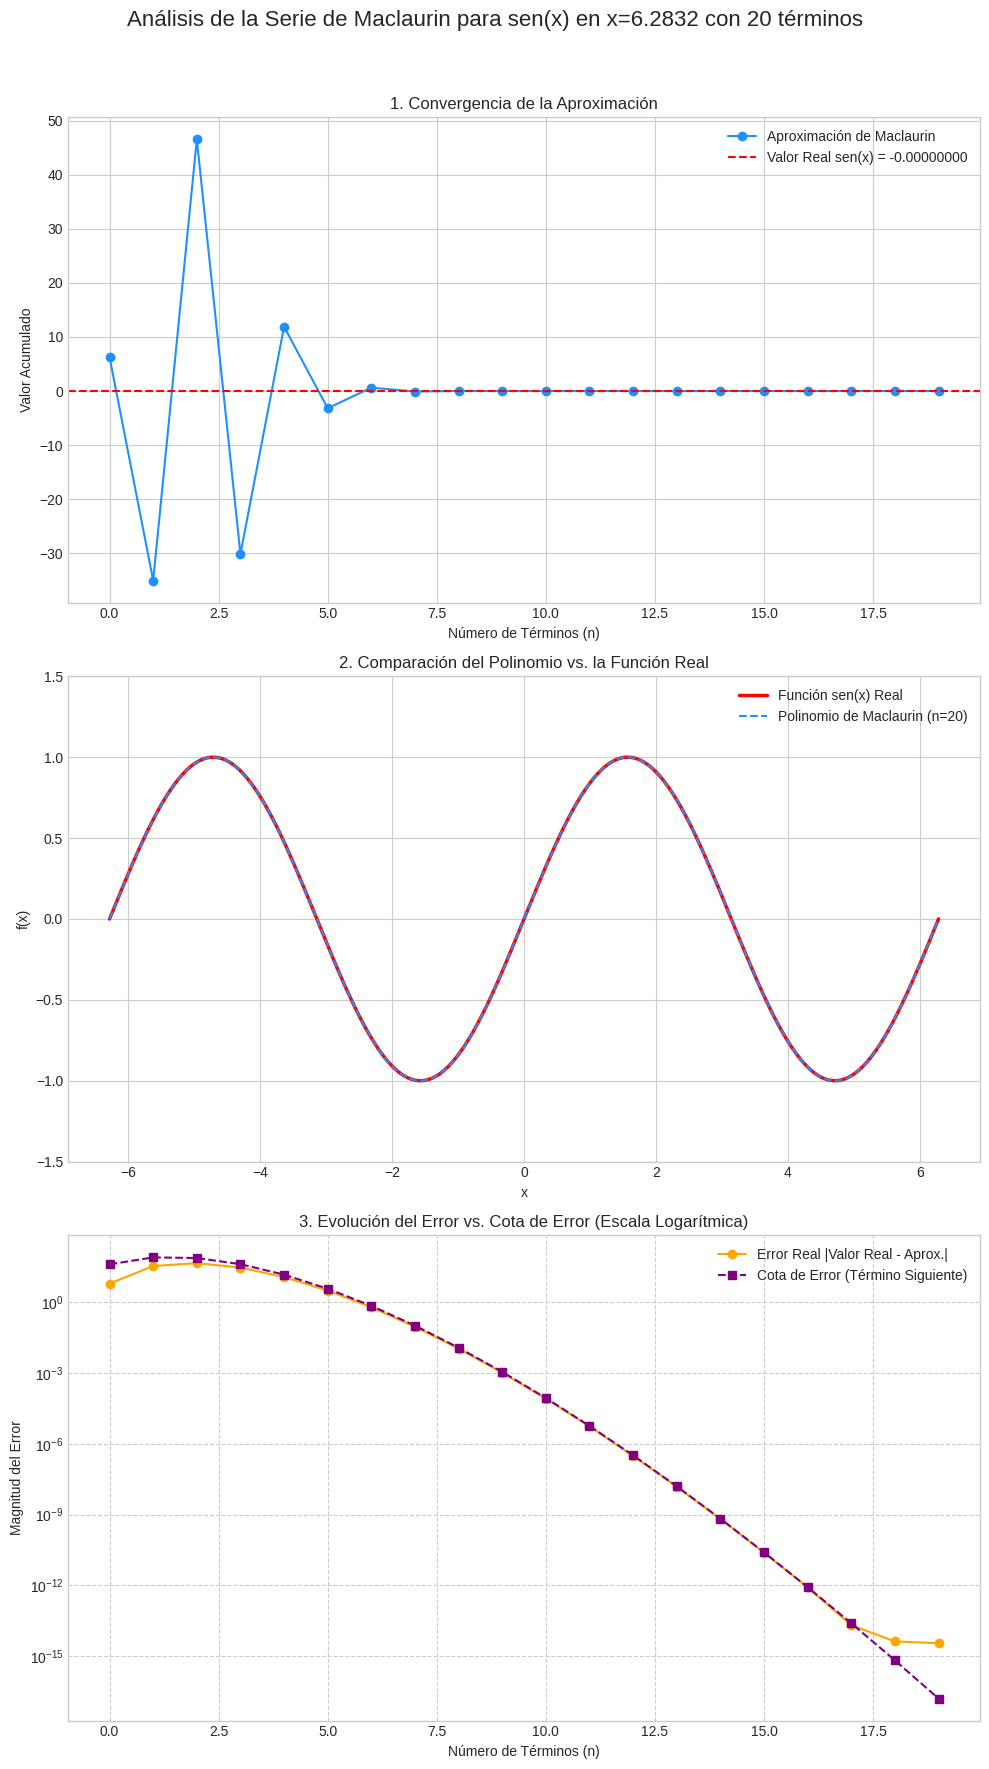

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

def get_user_input():
    """
    Obtiene y valida las entradas del usuario para el valor de x y el número de términos.
    """
    print("--- Configuración del Análisis de Series de Maclaurin para sen(x) ---")

    # Obtener el valor de x
    x_str = input("➤ Introduce el valor de x a evaluar (puedes usar 'pi', ej: 2*pi): ")
    try:
        # Reemplaza 'pi' por su valor numérico para que eval() sea más seguro
        x_val = eval(x_str.lower().replace('pi', str(np.pi)))
    except (SyntaxError, NameError):
        print("Error: Entrada inválida para x. Se usará x = 2*pi por defecto.")
        x_val = 2 * np.pi

    # Obtener el número de términos
    while True:
        try:
            n_terms = int(input("➤ Introduce el número de términos (n) a utilizar (ej: 20): "))
            if n_terms > 0:
                break
            else:
                print("Por favor, introduce un entero positivo.")
        except ValueError:
            print("Entrada inválida. Por favor, introduce un número entero.")

    return x_val, n_terms

def calculate_maclaurin_sin(x_eval, num_terms):
    """
    Calcula la serie de Maclaurin para sen(x) término a término.
    Devuelve un DataFrame de pandas con los resultados detallados.
    """
    true_value = np.sin(x_eval)

    # Listas para almacenar los resultados de cada iteración
    n_list, term_list, sum_list, error_list, bound_list = [], [], [], [], []

    cumulative_sum = 0.0
    for n in range(num_terms):
        # Fórmula del término: (-1)^n * x^(2n+1) / (2n+1)!
        term = ((-1)**n * x_eval**(2*n + 1)) / math.factorial(2*n + 1)

        cumulative_sum += term
        actual_error = abs(true_value - cumulative_sum)

        # Cota de error: valor absoluto del primer término no incluido
        error_bound = (abs(x_eval)**(2*n + 3)) / math.factorial(2*n + 3)

        # Guardar resultados
        n_list.append(n)
        term_list.append(term)
        sum_list.append(cumulative_sum)
        error_list.append(actual_error)
        bound_list.append(error_bound)

    # Crear un DataFrame con los resultados
    results_df = pd.DataFrame({
        'n': n_list,
        'Valor del Término': term_list,
        'Suma Acumulada (Aprox.)': sum_list,
        'Error Real': error_list,
        'Cota de Error': bound_list
    })
    return results_df, true_value

def plot_results(df, true_value, x_eval, num_terms):
    """
    Genera las tres gráficas principales para visualizar los resultados.
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(3, 1, figsize=(10, 18))
    fig.suptitle(f'Análisis de la Serie de Maclaurin para sen(x) en x={x_eval:.4f} con {num_terms} términos', fontsize=16)

    # --- Gráfica 1: Convergencia de la Serie ---
    axes[0].plot(df['n'], df['Suma Acumulada (Aprox.)'], 'o-', label='Aproximación de Maclaurin', color='dodgerblue')
    axes[0].axhline(y=true_value, color='red', linestyle='--', label=f'Valor Real sen(x) = {true_value:.8f}')
    axes[0].set_title('1. Convergencia de la Aproximación', fontsize=12)
    axes[0].set_xlabel('Número de Términos (n)')
    axes[0].set_ylabel('Valor Acumulado')
    axes[0].legend()
    axes[0].grid(True)

    # --- Gráfica 2: Comparación de Funciones ---
    x_range = np.linspace(-2 * np.pi, 2 * np.pi, 400)
    y_true = np.sin(x_range)
    y_maclaurin = sum([((-1)**n * x_range**(2*n + 1)) / math.factorial(2*n + 1) for n in range(num_terms)])

    axes[1].plot(x_range, y_true, label='Función sen(x) Real', color='red', linewidth=2.5)
    axes[1].plot(x_range, y_maclaurin, label=f'Polinomio de Maclaurin (n={num_terms})', color='dodgerblue', linestyle='--')
    axes[1].set_title('2. Comparación del Polinomio vs. la Función Real', fontsize=12)
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('f(x)')
    axes[1].set_ylim(-1.5, 1.5)
    axes[1].legend()
    axes[1].grid(True)

    # --- Gráfica 3: Análisis del Error ---
    axes[2].plot(df['n'], df['Error Real'], 'o-', label='Error Real |Valor Real - Aprox.|', color='orange')
    axes[2].plot(df['n'], df['Cota de Error'], 's--', label='Cota de Error (Término Siguiente)', color='purple')
    axes[2].set_yscale('log') # Escala logarítmica para apreciar la caída del error
    axes[2].set_title('3. Evolución del Error vs. Cota de Error (Escala Logarítmica)', fontsize=12)
    axes[2].set_xlabel('Número de Términos (n)')
    axes[2].set_ylabel('Magnitud del Error')
    axes[2].legend()
    axes[2].grid(True, which="both", ls="--")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig("analisis_maclaurin_seno.png")
    plt.show()

# --- Bloque Principal de Ejecución ---
if __name__ == "__main__":
    x_to_evaluate, n_terms_to_use = get_user_input()

    results, true_val = calculate_maclaurin_sin(x_to_evaluate, n_terms_to_use)

    final_approximation = results['Suma Acumulada (Aprox.)'].iloc[-1]
    final_error = results['Error Real'].iloc[-1]

    print("\n--- Resultados del Cálculo ---")
    pd.set_option('display.float_format', '{:.6e}'.format)
    print(results)

    print("\nResumen Final:")
    print(f"  Valor Real de sen({x_to_evaluate:.4f}): {true_val:.8f}")
    print(f"  Valor Aproximado con {n_terms_to_use} términos: {final_approximation:.8f}")
    print(f"  Error Real Final: {final_error:.6e}\n")

    print("Generando gráficas... Las gráficas también se guardarán en 'analisis_maclaurin_seno.png'")
    plot_results(results, true_val, x_to_evaluate, n_terms_to_use)

--- Comparación de Series de Taylor para sen(x) ---
➤ Introduce el número de términos (n) a utilizar (ej: 20): 30

--- Resultados para Serie Maclaurin (centrada en a=0) ---
     n  Valor del Término  Suma Acumulada   Error Real
0    0       0.000000e+00    0.000000e+00 2.449294e-16
1    1       6.283185e+00    6.283185e+00 6.283185e+00
2    2      -0.000000e+00    6.283185e+00 6.283185e+00
3    3      -4.134170e+01   -3.505852e+01 3.505852e+01
4    4       0.000000e+00   -3.505852e+01 3.505852e+01
5    5       8.160525e+01    4.654673e+01 4.654673e+01
6    6      -0.000000e+00    4.654673e+01 4.654673e+01
7    7      -7.670586e+01   -3.015913e+01 3.015913e+01
8    8       0.000000e+00   -3.015913e+01 3.015913e+01
9    9       4.205869e+01    1.189957e+01 1.189957e+01
10  10      -0.000000e+00    1.189957e+01 1.189957e+01
11  11      -1.509464e+01   -3.195076e+00 3.195076e+00
12  12       0.000000e+00   -3.195076e+00 3.195076e+00
13  13       3.819953e+00    6.248765e-01 6.248765e-01
14

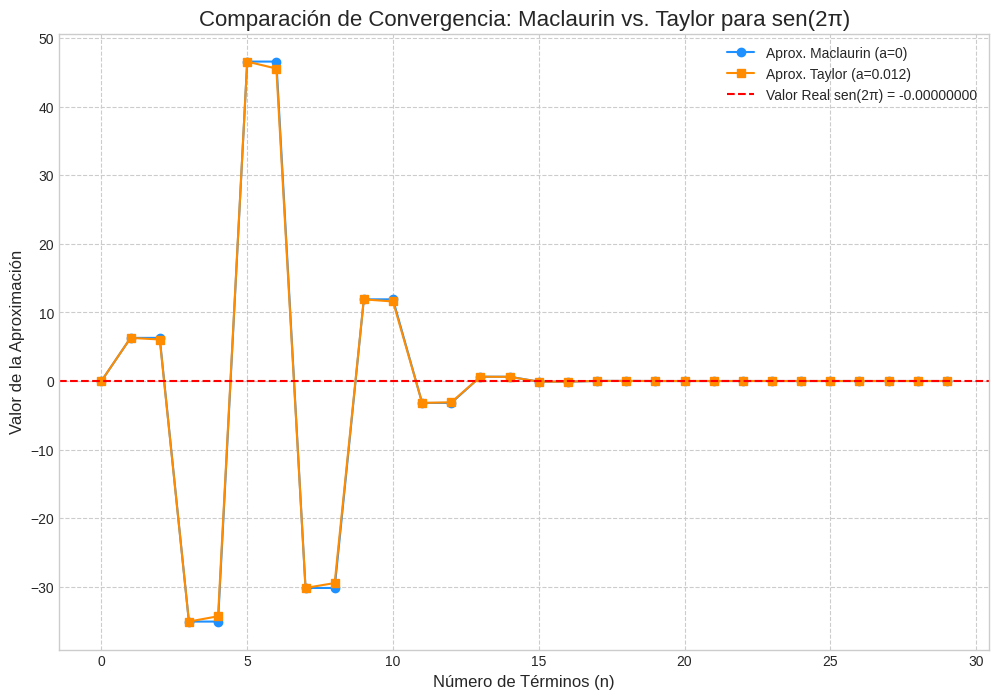

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

def get_user_input():
    """
    Obtiene y valida la entrada del usuario para el número de términos.
    """
    print("--- Comparación de Series de Taylor para sen(x) ---")
    while True:
        try:
            n_terms = int(input("➤ Introduce el número de términos (n) a utilizar (ej: 20): "))
            if n_terms > 0:
                break
            else:
                print("Por favor, introduce un entero positivo.")
        except ValueError:
            print("Entrada inválida. Por favor, introduce un número entero.")
    return n_terms

def calculate_taylor_series(x_eval, center_a, num_terms):
    """
    Calcula la serie de Taylor para sen(x) para un centro 'a' dado.
    Devuelve un DataFrame de pandas con los resultados detallados.
    """
    true_value = np.sin(x_eval)

    # Listas para almacenar los resultados
    n_list, term_list, sum_list, error_list = [], [], [], []

    # Pre-calcula los valores de las derivadas en el punto 'a'
    # El patrón es: sen(a), cos(a), -sen(a), -cos(a)
    deriv_vals_at_a = [np.sin(center_a), np.cos(center_a), -np.sin(center_a), -np.cos(center_a)]

    cumulative_sum = 0.0
    for n in range(num_terms):
        # f^(n)(a)
        f_n_a = deriv_vals_at_a[n % 4]

        # (x-a)^n
        x_minus_a_pow_n = (x_eval - center_a)**n

        # n!
        n_factorial = math.factorial(n)

        # Término completo de la serie de Taylor
        term = (f_n_a * x_minus_a_pow_n) / n_factorial

        cumulative_sum += term
        actual_error = abs(true_value - cumulative_sum)

        # Guardar resultados
        n_list.append(n)
        term_list.append(term)
        sum_list.append(cumulative_sum)
        error_list.append(actual_error)

    results_df = pd.DataFrame({
        'n': n_list,
        'Valor del Término': term_list,
        'Suma Acumulada': sum_list,
        'Error Real': error_list
    })

    return results_df, true_value

def plot_comparison(df_compare, true_value):
    """
    Genera una gráfica que compara la convergencia de dos series.
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))

    # Graficar ambas series
    plt.plot(df_compare['n'], df_compare['Aprox. Maclaurin (a=0)'], 'o-', label='Aprox. Maclaurin (a=0)', color='dodgerblue')
    plt.plot(df_compare['n'], df_compare['Aprox. Taylor (a=0.012)'], 's-', label='Aprox. Taylor (a=0.012)', color='darkorange')

    # Línea del valor verdadero para referencia
    plt.axhline(y=true_value, color='red', linestyle='--', label=f'Valor Real sen(2π) = {true_value:.8f}')

    plt.title('Comparación de Convergencia: Maclaurin vs. Taylor para sen(2π)', fontsize=16)
    plt.xlabel('Número de Términos (n)', fontsize=12)
    plt.ylabel('Valor de la Aproximación', fontsize=12)
    plt.legend()
    plt.grid(True, which="both", ls="--")

    plt.savefig("comparacion_series_taylor.png")
    plt.show()

# --- Bloque Principal de Ejecución ---
if __name__ == "__main__":
    # --- Parámetros del Ejercicio ---
    X_EVAL = 2 * np.pi
    A_MACLAURIN = 0.0
    A_TAYLOR = 0.012

    n_terms_to_use = get_user_input()

    # --- Cálculos ---
    df_maclaurin, true_val = calculate_taylor_series(X_EVAL, A_MACLAURIN, n_terms_to_use)
    df_taylor, _ = calculate_taylor_series(X_EVAL, A_TAYLOR, n_terms_to_use)

    # --- Presentación de Resultados ---
    pd.set_option('display.float_format', '{:.6e}'.format)

    print("\n--- Resultados para Serie Maclaurin (centrada en a=0) ---")
    print(df_maclaurin)

    print("\n--- Resultados para Serie Taylor (centrada en a=0.012) ---")
    print(df_taylor)

    # --- Preparar datos para la gráfica comparativa ---
    df_comparison = pd.DataFrame({
        'n': df_maclaurin['n'],
        'Aprox. Maclaurin (a=0)': df_maclaurin['Suma Acumulada'],
        'Aprox. Taylor (a=0.012)': df_taylor['Suma Acumulada']
    })

    print("\n--- Tabla Comparativa de Aproximaciones ---")
    print(df_comparison)

    print("\nGenerando gráfica comparativa...")
    plot_comparison(df_comparison, true_val)

--- Comparación de Series de Taylor para sen(x) ---
➤ Introduce el número de términos (n) a utilizar (ej: 30): 20

Generando panel de gráficas...


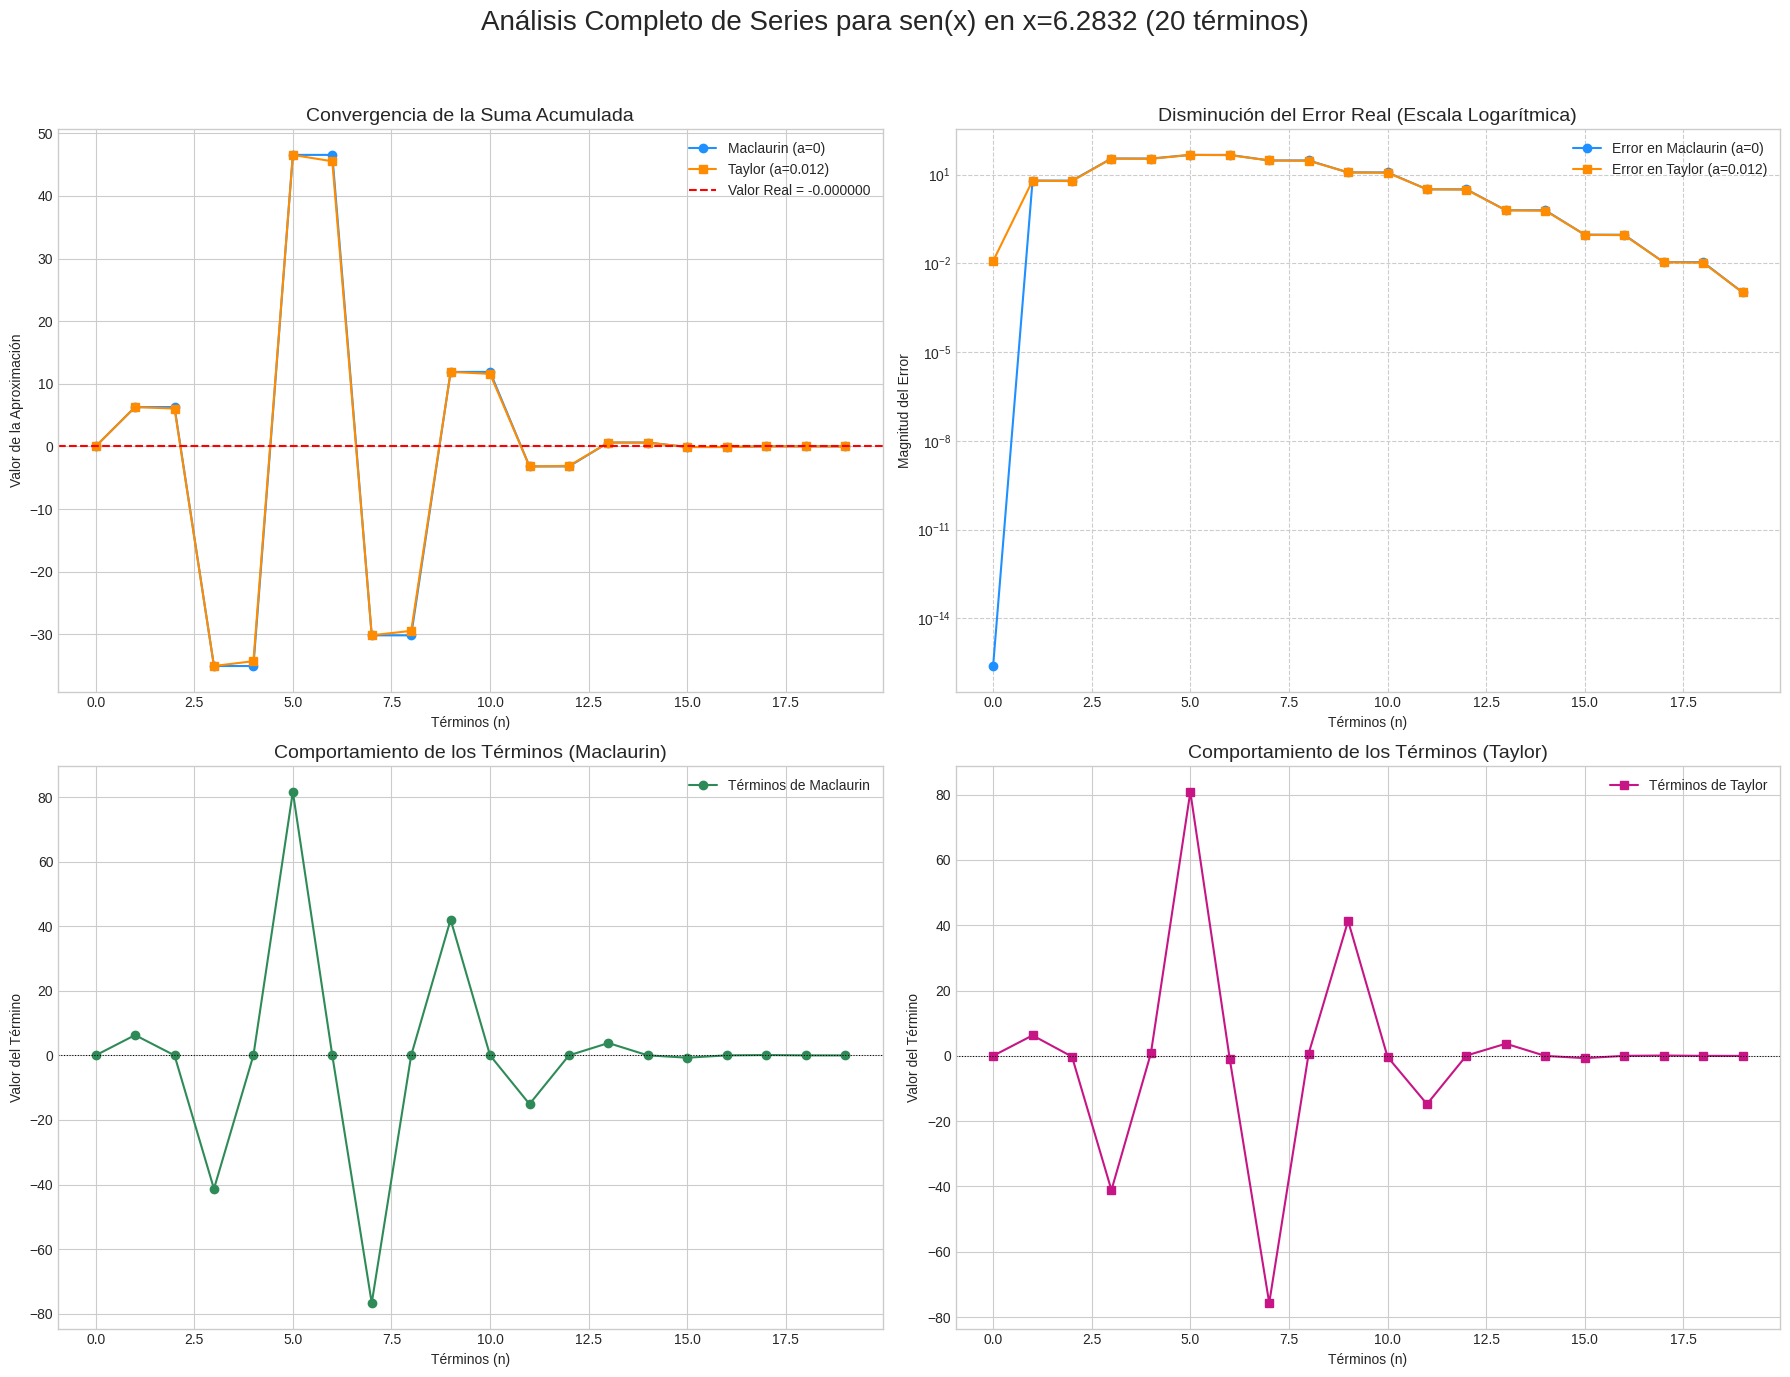


¡Gráficas generadas! La imagen se ha guardado como 'analisis_completo_series.png'


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

def get_user_input():
    """
    Obtiene y valida la entrada del usuario para el número de términos.
    """
    print("--- Comparación de Series de Taylor para sen(x) ---")
    while True:
        try:
            n_terms = int(input("➤ Introduce el número de términos (n) a utilizar (ej: 30): "))
            if n_terms > 0:
                break
            else:
                print("Por favor, introduce un entero positivo.")
        except ValueError:
            print("Entrada inválida. Por favor, introduce un número entero.")
    return n_terms

def calculate_taylor_series(x_eval, center_a, num_terms):
    """
    Calcula la serie de Taylor para sen(x) para un centro 'a' dado.
    Devuelve un DataFrame de pandas con los resultados detallados.
    """
    true_value = np.sin(x_eval)

    # Listas para almacenar los resultados
    n_list, term_list, sum_list, error_list = [], [], [], []

    # Pre-calcula los valores de las derivadas en el punto 'a'
    deriv_vals_at_a = [np.sin(center_a), np.cos(center_a), -np.sin(center_a), -np.cos(center_a)]

    cumulative_sum = 0.0
    for n in range(num_terms):
        f_n_a = deriv_vals_at_a[n % 4]
        x_minus_a_pow_n = (x_eval - center_a)**n
        n_factorial = math.factorial(n)
        term = (f_n_a * x_minus_a_pow_n) / n_factorial

        cumulative_sum += term
        actual_error = abs(true_value - cumulative_sum)

        n_list.append(n)
        term_list.append(term)
        sum_list.append(cumulative_sum)
        error_list.append(actual_error)

    results_df = pd.DataFrame({
        'n': n_list,
        'Valor del Término': term_list,
        'Suma Acumulada': sum_list,
        'Error Real': error_list
    })

    return results_df, true_value

def plot_all_graphs(df_mac, df_tay, true_value, x_eval, num_terms):
    """
    Genera un panel de 2x2 con todas las gráficas solicitadas.
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # 2 filas, 2 columnas
    fig.suptitle(f'Análisis Completo de Series para sen(x) en x={x_eval:.4f} ({num_terms} términos)', fontsize=20)

    # --- 1. Gráfica de Suma Acumulada (Convergencia) ---
    ax = axes[0, 0]
    ax.plot(df_mac['n'], df_mac['Suma Acumulada'], 'o-', label='Maclaurin (a=0)', color='dodgerblue')
    ax.plot(df_tay['n'], df_tay['Suma Acumulada'], 's-', label='Taylor (a=0.012)', color='darkorange')
    ax.axhline(y=true_value, color='red', linestyle='--', label=f'Valor Real = {true_value:.6f}')
    ax.set_title('Convergencia de la Suma Acumulada', fontsize=14)
    ax.set_xlabel('Términos (n)')
    ax.set_ylabel('Valor de la Aproximación')
    ax.legend()
    ax.grid(True)

    # --- 2. Gráfica de Error Real ---
    ax = axes[0, 1]
    ax.plot(df_mac['n'], df_mac['Error Real'], 'o-', label='Error en Maclaurin (a=0)', color='dodgerblue')
    ax.plot(df_tay['n'], df_tay['Error Real'], 's-', label='Error en Taylor (a=0.012)', color='darkorange')
    ax.set_yscale('log') # Escala logarítmica es clave para ver el error
    ax.set_title('Disminución del Error Real (Escala Logarítmica)', fontsize=14)
    ax.set_xlabel('Términos (n)')
    ax.set_ylabel('Magnitud del Error')
    ax.legend()
    ax.grid(True, which="both", ls="--")

    # --- 3. Gráfica de Valor del Término (Maclaurin) ---
    ax = axes[1, 0]
    ax.plot(df_mac['n'], df_mac['Valor del Término'], 'o-', color='seagreen', label='Términos de Maclaurin')
    ax.axhline(y=0, color='black', linestyle=':', linewidth=0.75)
    ax.set_title('Comportamiento de los Términos (Maclaurin)', fontsize=14)
    ax.set_xlabel('Términos (n)')
    ax.set_ylabel('Valor del Término')
    ax.legend()
    ax.grid(True)

    # --- 4. Gráfica de Valor del Término (Taylor) ---
    ax = axes[1, 1]
    ax.plot(df_tay['n'], df_tay['Valor del Término'], 's-', color='mediumvioletred', label='Términos de Taylor')
    ax.axhline(y=0, color='black', linestyle=':', linewidth=0.75)
    ax.set_title('Comportamiento de los Términos (Taylor)', fontsize=14)
    ax.set_xlabel('Términos (n)')
    ax.set_ylabel('Valor del Término')
    ax.legend()
    ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajustar para que el supertítulo no se solape
    plt.savefig("analisis_completo_series.png")
    plt.show()

# --- Bloque Principal de Ejecución ---
if __name__ == "__main__":
    # --- Parámetros del Ejercicio ---
    X_EVAL = 2 * np.pi
    A_MACLAURIN = 0.0
    A_TAYLOR = 0.012

    n_terms_to_use = get_user_input()

    # --- Cálculos ---
    df_maclaurin, true_val = calculate_taylor_series(X_EVAL, A_MACLAURIN, n_terms_to_use)
    df_taylor, _ = calculate_taylor_series(X_EVAL, A_TAYLOR, n_terms_to_use)

    print("\nGenerando panel de gráficas...")
    plot_all_graphs(df_maclaurin, df_taylor, true_val, X_EVAL, n_terms_to_use)
    print("\n¡Gráficas generadas! La imagen se ha guardado como 'analisis_completo_series.png'")

Calculando polinomios de Taylor para f(x) = 1/(1-x^2)...
--- OMITIENDO a=1: No se puede crear una serie en una asíntota. ---

--- Resultados para el Polinomio centrado en a=0 ---
La serie CONVERGE a ~17323708.41472
   n  Valor del Término  Suma (Polinomio)  Error Real
0  0         1.0000e+00        1.0000e+00  1.1905e+00
1  1         0.0000e+00        1.0000e+00  1.1905e+00
2  2         6.2500e+00        7.2500e+00  7.4405e+00
3  3         0.0000e+00        7.2500e+00  7.4405e+00
4  4         3.9062e+01        4.6312e+01  4.6503e+01

--- Resultados para el Polinomio centrado en a=2 ---
La serie CONVERGE a ~-0.19048
   n  Valor del Término  Suma (Polinomio)  Error Real
0  0        -3.3333e-01       -3.3333e-01  1.4286e-01
1  1         2.2222e-01       -1.1111e-01  7.9365e-02
2  2        -1.2037e-01       -2.3148e-01  4.1005e-02
3  3         6.1728e-02       -1.6975e-01  2.0723e-02
4  4        -3.1121e-02       -2.0087e-01  1.0398e-02

--- Resultados para el Polinomio centrado en a=3 ---

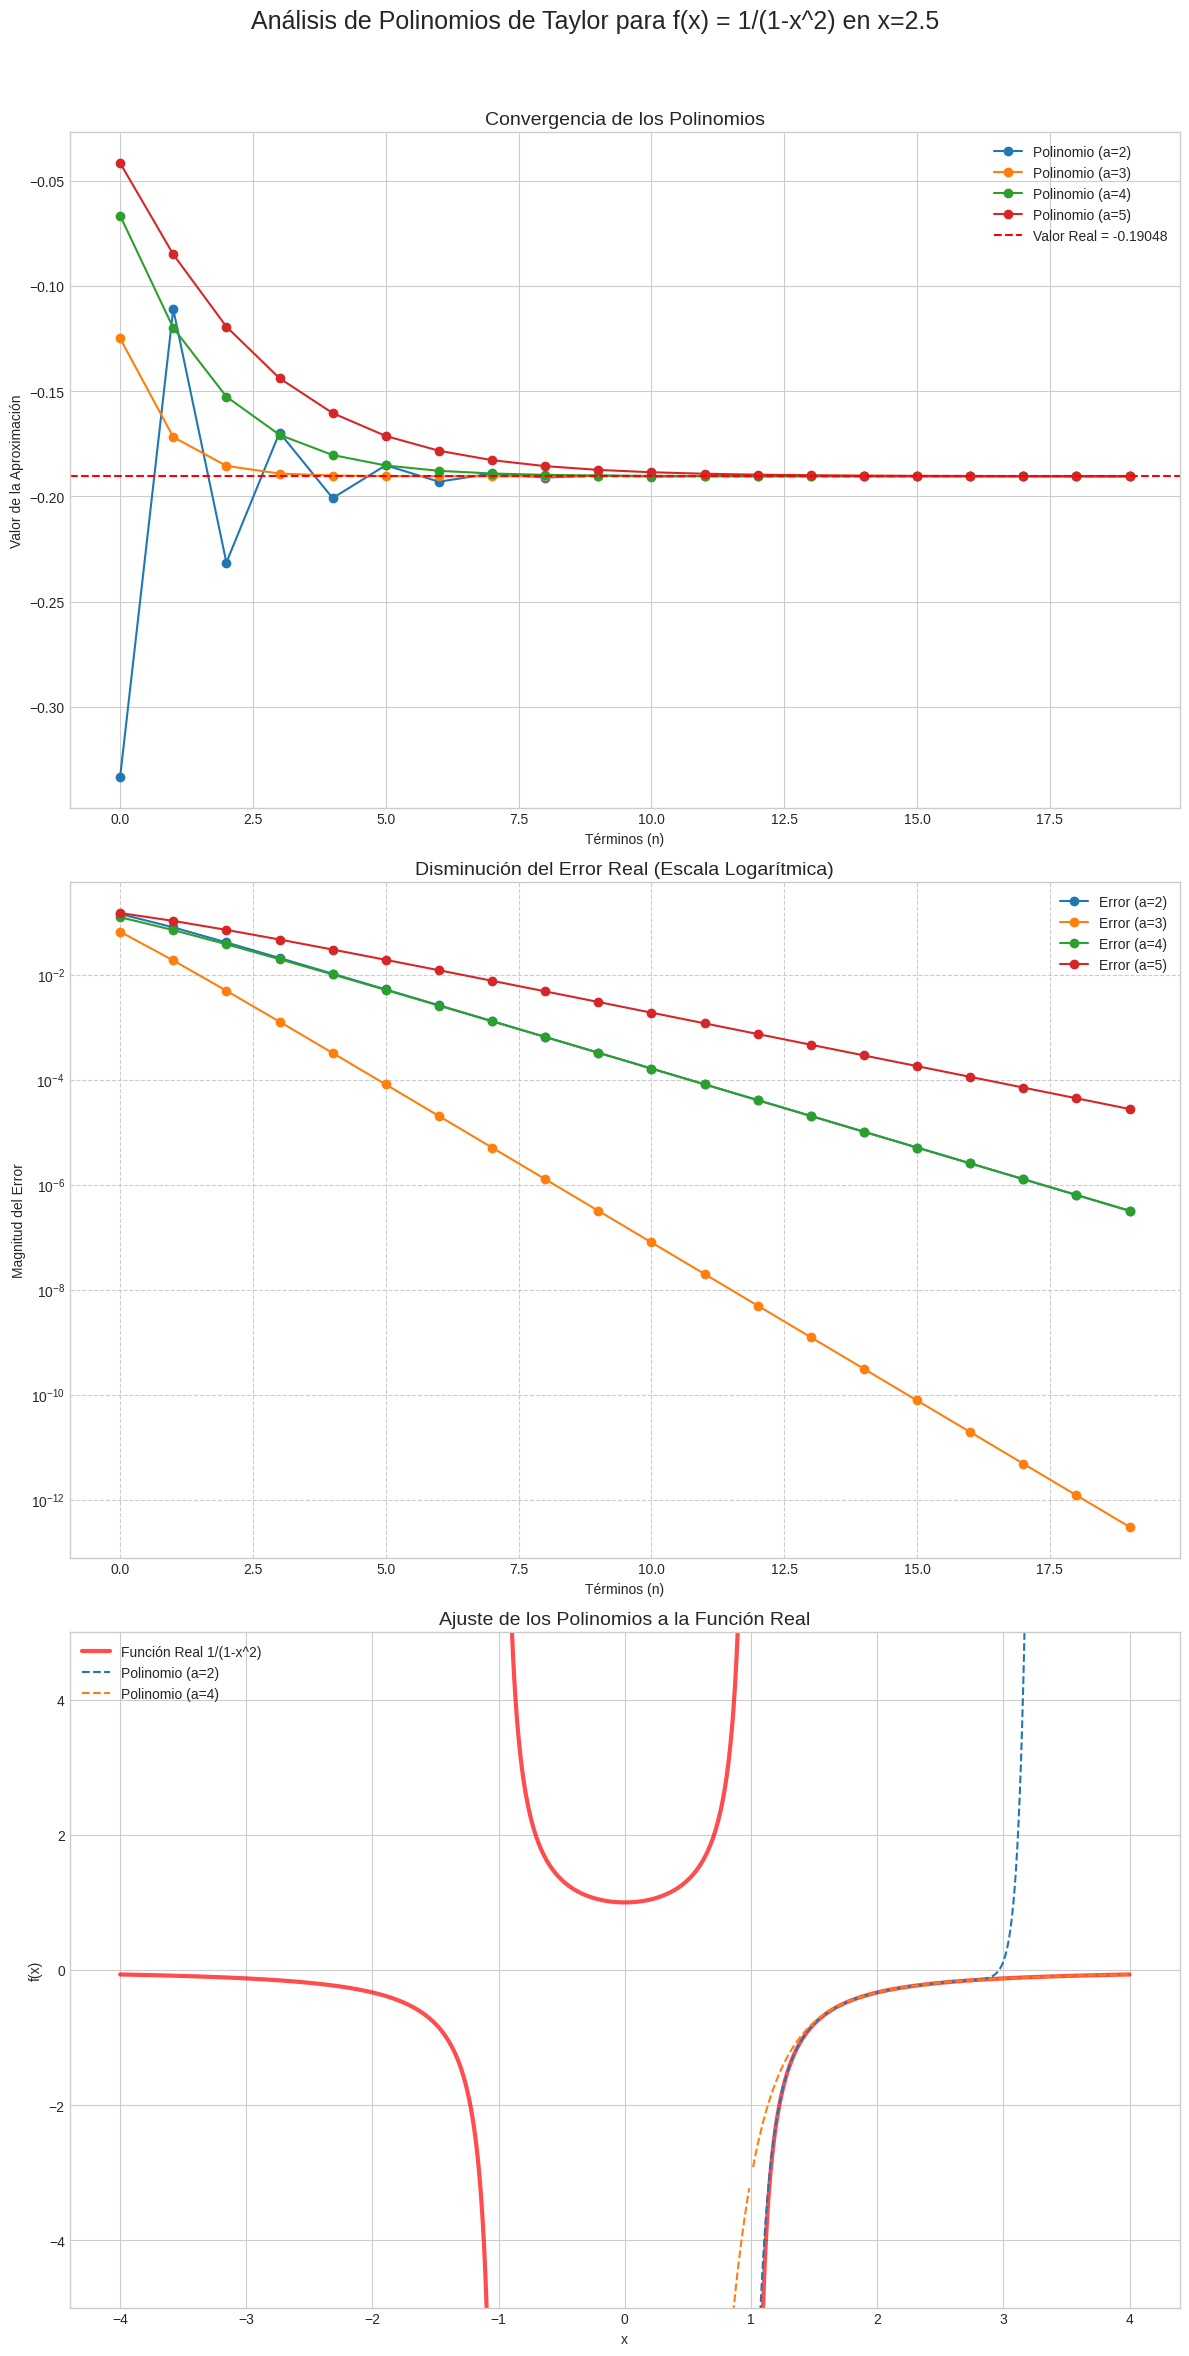


¡Análisis completo! La imagen se ha guardado como 'analisis_punto_c.png'


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# --- Parámetros definidos por la tarea ---
CENTERS_A = [0, 1, 2, 3, 4, 5]
X_EVAL = 2.5
N_TERMS = 20

def calculate_taylor_polynomial(x_eval, center_a, num_terms):
    """
    Calcula la serie de Taylor para f(x) = 1/(1-x^2).
    Maneja los errores en las asíntotas (a=1, a=-1).
    """
    # Manejar el caso de la asíntota donde la función no está definida.
    if abs(center_a) == 1:
        print(f"--- OMITIENDO a={center_a}: No se puede crear una serie en una asíntota. ---")
        return None, None

    true_value = 1 / (1 - x_eval**2)

    n_list, term_list, sum_list, error_list = [], [], [], []
    cumulative_sum = 0.0

    for n in range(num_terms):
        try:
            # Fórmula general para la n-ésima derivada evaluada en 'center_a'
            term_deriv_part1 = 1 / (1 - center_a)**(n + 1)
            term_deriv_part2 = ((-1)**n) / (1 + center_a)**(n + 1)
            f_n_a = (math.factorial(n) / 2) * (term_deriv_part1 + term_deriv_part2)

            # Término completo de la serie de Taylor
            term = (f_n_a / math.factorial(n)) * (x_eval - center_a)**n

        except (ValueError, OverflowError):
            # Si los números se vuelven demasiado grandes (divergencia), los marcamos como Infinito.
            term = np.inf

        # Si el término es infinito, la suma también lo será.
        if np.isinf(term):
            cumulative_sum = np.inf
        else:
            cumulative_sum += term

        actual_error = abs(true_value - cumulative_sum)

        n_list.append(n)
        term_list.append(term)
        sum_list.append(cumulative_sum)
        error_list.append(actual_error)

    results_df = pd.DataFrame({
        'n': n_list,
        'Valor del Término': term_list,
        'Suma (Polinomio)': sum_list,
        'Error Real': error_list
    })
    return results_df, true_value

def plot_all_results(results_dict, true_value):
    """
    Genera un panel completo con 3 gráficas de análisis.
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(3, 1, figsize=(12, 24)) # 3 filas, 1 columna
    fig.suptitle(f'Análisis de Polinomios de Taylor para f(x) = 1/(1-x^2) en x={X_EVAL}', fontsize=18)

    # --- 1. Gráfica de Convergencia de Polinomios ---
    ax = axes[0]
    for center, df in results_dict.items():
        # No graficar la divergencia para no arruinar la escala de los otros
        if center != 0:
            ax.plot(df['n'], df['Suma (Polinomio)'], 'o-', label=f'Polinomio (a={center})')
    ax.axhline(y=true_value, color='red', linestyle='--', label=f'Valor Real = {true_value:.5f}')
    ax.set_title('Convergencia de los Polinomios', fontsize=14)
    ax.set_xlabel('Términos (n)')
    ax.set_ylabel('Valor de la Aproximación')
    ax.legend()
    ax.grid(True)

    # --- 2. Gráfica de Comparación de Errores ---
    ax = axes[1]
    for center, df in results_dict.items():
        if center != 0:
            ax.plot(df['n'], df['Error Real'], 'o-', label=f'Error (a={center})')
    ax.set_yscale('log')
    ax.set_title('Disminución del Error Real (Escala Logarítmica)', fontsize=14)
    ax.set_xlabel('Términos (n)')
    ax.set_ylabel('Magnitud del Error')
    ax.legend()
    ax.grid(True, which="both", ls="--")

    # --- 3. Gráfica de Ajuste de Funciones ---
    ax = axes[2]
    x_range = np.linspace(-4, 4, 800)
    # Evitar graficar en las asíntotas para una mejor visualización
    x_range[np.abs(np.abs(x_range) - 1) < 0.01] = np.nan
    y_true = 1 / (1 - x_range**2)
    ax.plot(x_range, y_true, label='Función Real 1/(1-x^2)', color='red', linewidth=3, alpha=0.7)

    # Graficar dos de los polinomios convergentes para ver su ajuste local
    for center_to_plot in [2, 4]:
        if center_to_plot in results_dict:
            df = results_dict[center_to_plot]
            coeffs = [(df['Valor del Término'][n] / (X_EVAL - center_to_plot)**n) if (X_EVAL - center_to_plot) != 0 else 0 for n in range(N_TERMS)]
            y_poly = sum([coeffs[n] * (x_range - center_to_plot)**n for n in range(N_TERMS)])
            ax.plot(x_range, y_poly, linestyle='--', label=f'Polinomio (a={center_to_plot})')

    ax.set_title('Ajuste de los Polinomios a la Función Real', fontsize=14)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_ylim(-5, 5) # Limitar el eje Y para ver mejor el ajuste
    ax.legend()
    ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig("analisis_punto_c.png")
    plt.show()

# --- Bloque Principal de Ejecución ---
if __name__ == "__main__":
    all_results_dict = {}
    true_val = 0

    print("Calculando polinomios de Taylor para f(x) = 1/(1-x^2)...")

    for center_point in CENTERS_A:
        df_result, true_val_calc = calculate_taylor_polynomial(X_EVAL, center_point, N_TERMS)
        if df_result is not None:
            all_results_dict[center_point] = df_result
            true_val = true_val_calc # Se calcula una vez y se guarda

    pd.set_option('display.float_format', '{:.4e}'.format)

    for center, df in all_results_dict.items():
        print(f"\n--- Resultados para el Polinomio centrado en a={center} ---")
        if np.isinf(df['Suma (Polinomio)'].iloc[-1]):
             print("¡La serie DIVERGE como se esperaba!")
        else:
             print(f"La serie CONVERGE a ~{df['Suma (Polinomio)'].iloc[-1]:.5f}")
        print(df.head()) # Imprimir solo las primeras filas para no saturar la salida

    print("\nGenerando panel de gráficas...")
    plot_all_results(all_results_dict, true_val)
    print("\n¡Análisis completo! La imagen se ha guardado como 'analisis_punto_c.png'")

--- Herramienta Interactiva de Series de Taylor para f(x) = 1/(1-x^2) ---
➤ Introduce el punto 'x' a evaluar (ej: 2.5): 3
➤ Introduce los centros 'a' separados por comas (ej: 0, 2, 3, 4, 5): 0,1,2,3,4,5
➤ Introduce el número de términos (n) a utilizar (ej: 20): 10

Calculando polinomios de Taylor...
--- OMITIENDO a=1.0: No se puede crear una serie en una asíntota. ---

Generando panel de gráficas...


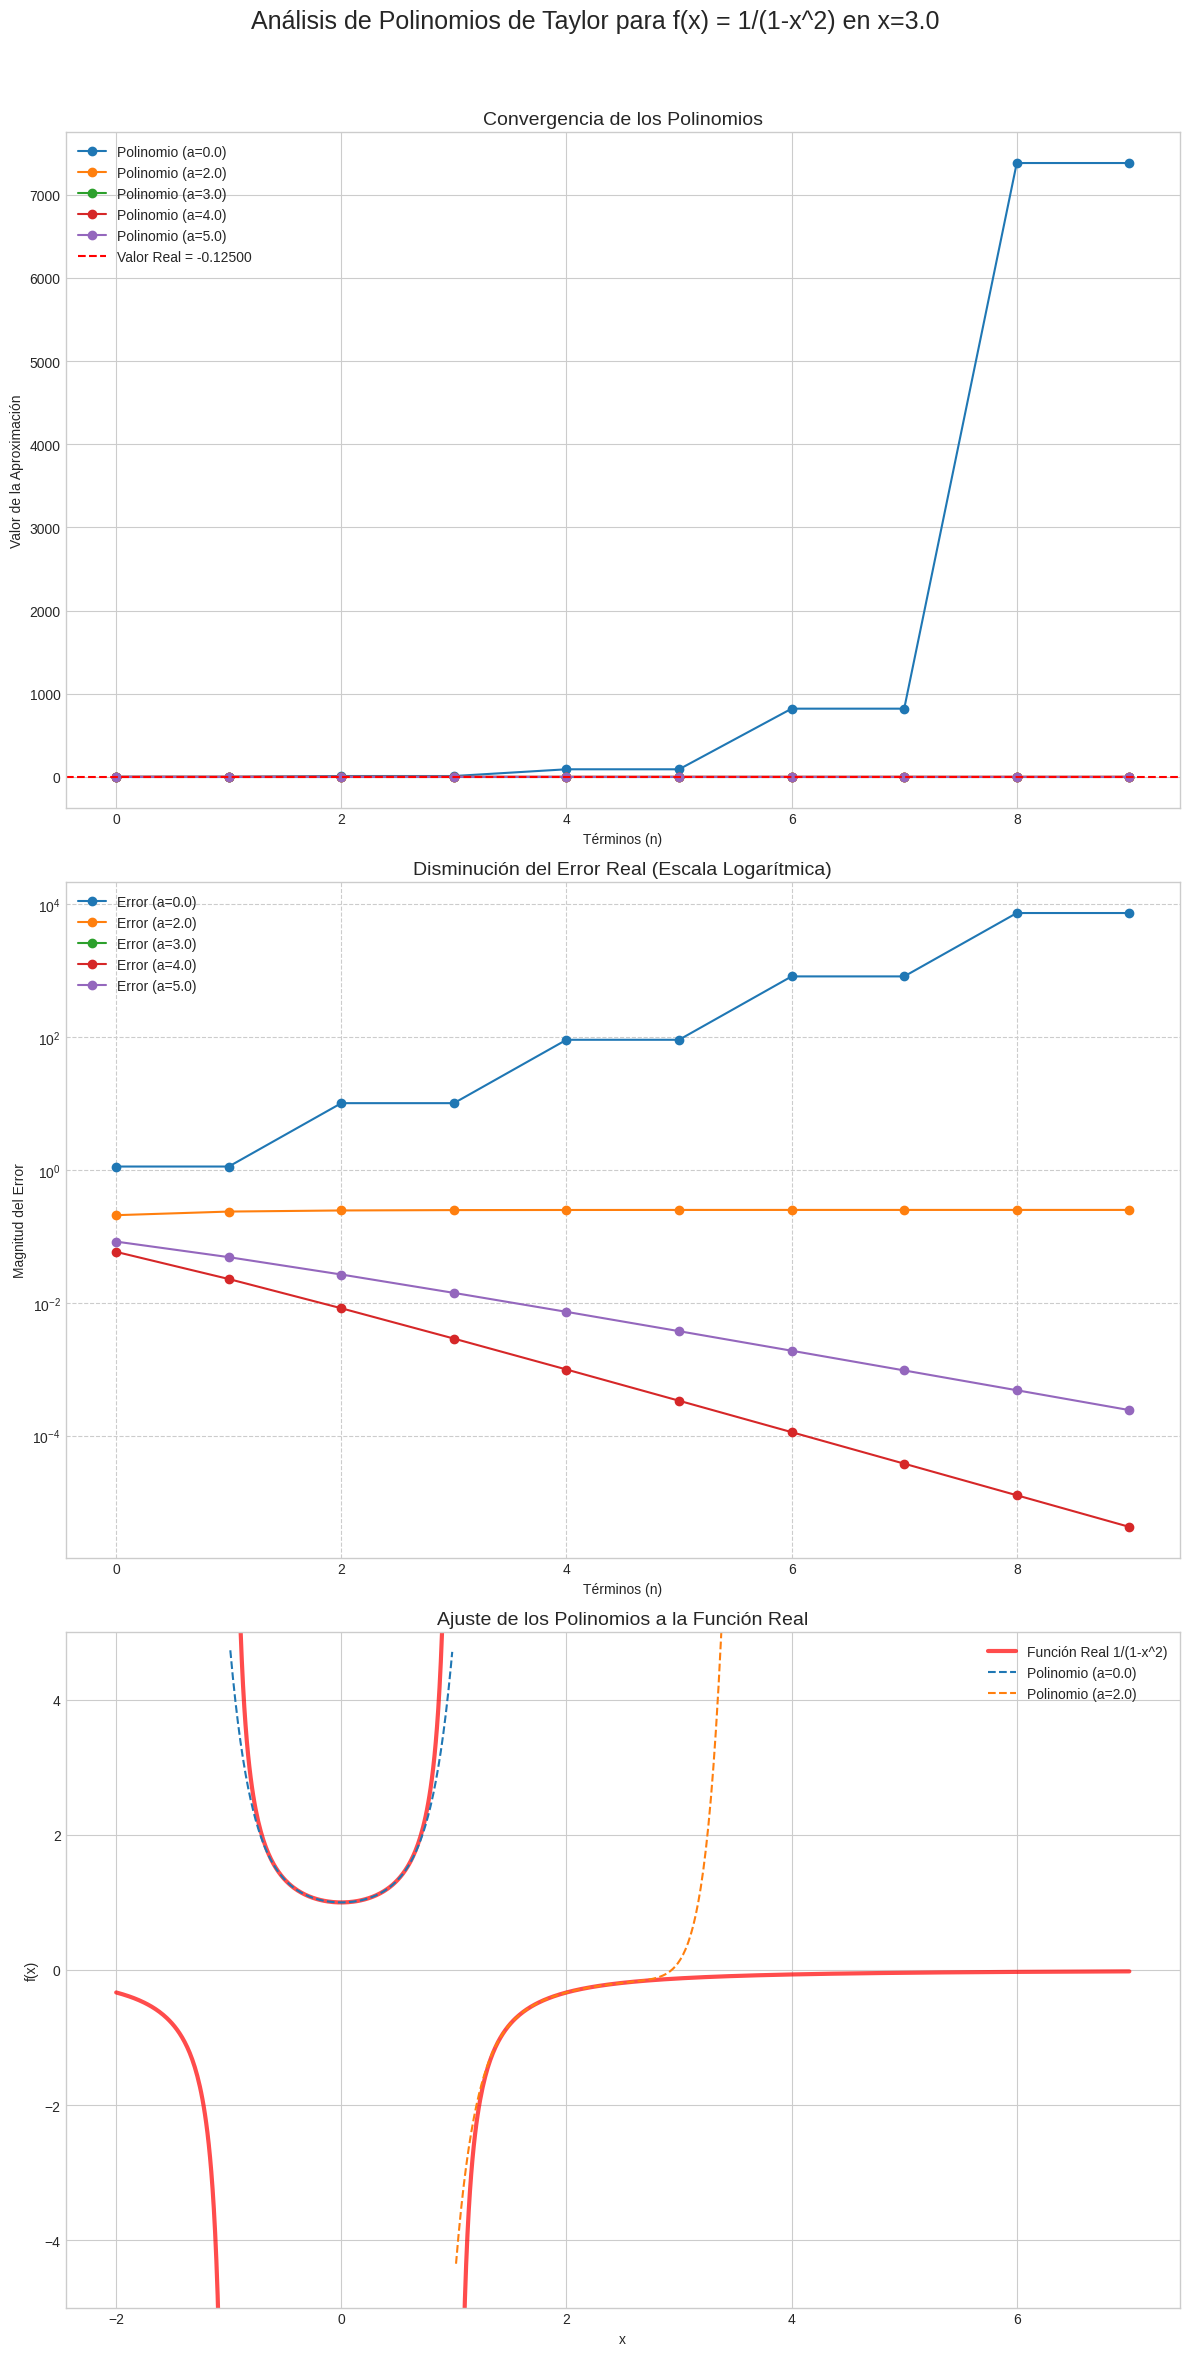


¡Análisis completo! La imagen se ha guardado como 'analisis_interactivo.png'


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

def get_user_input_interactive():
    """
    Obtiene y valida las entradas del usuario para x, los centros a y el número de términos.
    """
    print("--- Herramienta Interactiva de Series de Taylor para f(x) = 1/(1-x^2) ---")

    # Obtener el punto de evaluación x
    while True:
        try:
            x_str = input("➤ Introduce el punto 'x' a evaluar (ej: 2.5): ")
            x_val = float(x_str)
            break
        except ValueError:
            print("Entrada inválida. Por favor, introduce un número.")

    # Obtener los centros a
    while True:
        try:
            centers_str = input("➤ Introduce los centros 'a' separados por comas (ej: 0, 2, 3, 4, 5): ")
            centers_list = [float(item.strip()) for item in centers_str.split(',')]
            if centers_list:
                break
            else:
                print("No has introducido ningún centro.")
        except ValueError:
            print("Entrada inválida. Asegúrate de que la lista contenga solo números separados por comas.")

    # Obtener el número de términos n
    while True:
        try:
            n_terms = int(input("➤ Introduce el número de términos (n) a utilizar (ej: 20): "))
            if n_terms > 0:
                break
            else:
                print("Por favor, introduce un entero positivo.")
        except ValueError:
            print("Entrada inválida. Por favor, introduce un número entero.")

    return x_val, centers_list, n_terms

def calculate_taylor_polynomial(x_eval, center_a, num_terms):
    """
    Calcula la serie de Taylor para f(x) = 1/(1-x^2).
    Maneja los errores en las asíntotas (a=1, a=-1).
    """
    if abs(center_a) == 1:
        print(f"--- OMITIENDO a={center_a}: No se puede crear una serie en una asíntota. ---")
        return None, None

    true_value = 1 / (1 - x_eval**2) if (1 - x_eval**2) != 0 else np.inf

    n_list, term_list, sum_list, error_list = [], [], [], []
    cumulative_sum = 0.0

    for n in range(num_terms):
        try:
            term_deriv_part1 = 1 / (1 - center_a)**(n + 1)
            term_deriv_part2 = ((-1)**n) / (1 + center_a)**(n + 1)
            f_n_a = (math.factorial(n) / 2) * (term_deriv_part1 + term_deriv_part2)
            term = (f_n_a / math.factorial(n)) * (x_eval - center_a)**n
        except (ValueError, OverflowError):
            term = np.inf

        if np.isinf(term):
            cumulative_sum = np.inf
        else:
            cumulative_sum += term

        actual_error = abs(true_value - cumulative_sum)

        n_list.append(n)
        term_list.append(term)
        sum_list.append(cumulative_sum)
        error_list.append(actual_error)

    results_df = pd.DataFrame({
        'n': n_list,
        'Valor del Término': term_list,
        'Suma (Polinomio)': sum_list,
        'Error Real': error_list
    })
    return results_df, true_value

def plot_all_results(results_dict, true_value, x_eval, num_terms):
    """
    Genera un panel completo con 3 gráficas de análisis.
    """
    if not results_dict:
        print("\nNo hay datos válidos para graficar.")
        return

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(3, 1, figsize=(12, 24))
    fig.suptitle(f'Análisis de Polinomios de Taylor para f(x) = 1/(1-x^2) en x={x_eval}', fontsize=18)

    # Gráficas 1 y 2: Convergencia y Error
    ax1, ax2 = axes[0], axes[1]
    converging_centers = [c for c, df in results_dict.items() if not np.isinf(df['Suma (Polinomio)'].iloc[-1])]

    if converging_centers:
        for center in converging_centers:
            df = results_dict[center]
            ax1.plot(df['n'], df['Suma (Polinomio)'], 'o-', label=f'Polinomio (a={center})')
            ax2.plot(df['n'], df['Error Real'], 'o-', label=f'Error (a={center})')
        ax1.axhline(y=true_value, color='red', linestyle='--', label=f'Valor Real = {true_value:.5f}')

    ax1.set_title('Convergencia de los Polinomios', fontsize=14)
    ax1.set_xlabel('Términos (n)'); ax1.set_ylabel('Valor de la Aproximación'); ax1.legend(); ax1.grid(True)
    ax2.set_yscale('log'); ax2.set_title('Disminución del Error Real (Escala Logarítmica)', fontsize=14)
    ax2.set_xlabel('Términos (n)'); ax2.set_ylabel('Magnitud del Error'); ax2.legend(); ax2.grid(True, which="both", ls="--")

    # Gráfica 3: Ajuste de Funciones
    ax3 = axes[2]
    x_range = np.linspace(min(list(converging_centers) + [x_eval]) - 2, max(list(converging_centers) + [x_eval]) + 2, 800)
    x_range[np.abs(np.abs(x_range) - 1) < 0.01] = np.nan
    y_true = 1 / (1 - x_range**2)
    ax3.plot(x_range, y_true, label='Función Real 1/(1-x^2)', color='red', linewidth=3, alpha=0.7)

    # Graficar hasta dos de los polinomios convergentes
    for center_to_plot in converging_centers[:2]:
        df = results_dict[center_to_plot]
        coeffs = [(df['Valor del Término'][n] / (x_eval - center_to_plot)**n) if (x_eval - center_to_plot) != 0 else 0 for n in range(num_terms)]
        y_poly = sum([coeffs[n] * (x_range - center_to_plot)**n for n in range(num_terms)])
        ax3.plot(x_range, y_poly, linestyle='--', label=f'Polinomio (a={center_to_plot})')

    ax3.set_title('Ajuste de los Polinomios a la Función Real', fontsize=14)
    ax3.set_xlabel('x'); ax3.set_ylabel('f(x)'); ax3.set_ylim(-5, 5); ax3.legend(); ax3.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig("analisis_interactivo.png")
    plt.show()

# --- Bloque Principal de Ejecución ---
if __name__ == "__main__":
    x_to_evaluate, centers_to_analyze, n_terms_to_use = get_user_input_interactive()

    all_results_dict = {}
    true_val = 0

    print("\nCalculando polinomios de Taylor...")
    for center_point in centers_to_analyze:
        df_result, true_val_calc = calculate_taylor_polynomial(x_to_evaluate, center_point, n_terms_to_use)
        if df_result is not None:
            all_results_dict[center_point] = df_result
            if not np.isinf(true_val_calc):
                true_val = true_val_calc

    print("\nGenerando panel de gráficas...")
    plot_all_results(all_results_dict, true_val, x_to_evaluate, n_terms_to_use)
    print("\n¡Análisis completo! La imagen se ha guardado como 'analisis_interactivo.png'")